# Setting

In [1]:
from pf_utils import DataManager, BacktestManager, AssetEvaluator

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Data

## TDF
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [4]:
tdf = DataManager(
    file = '금융자산운용 - export.csv',
    universe = 'TDF',
    upload_type = 'rate',
    path = path_data
)

In [5]:
tdf.upload()
tdf.get_names()

Estimating price from rate ...
  error: -0.07 %
  error: -0.00 %
  error: 0.16 %
  error: -0.13 %
  error: 0.00 %
5 assets from 2017-08-14 to 2024-06-17 uploaded.
df_prices updated


0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
4) K55206C96311: 키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [6]:
tdf.get_date_range()

,start date,end date
K55301BU5479,2017-08-14,2024-06-16
K55301BU6139,2017-09-20,2024-06-16
K55301BU5453,2017-09-29,2024-06-16
K55206C96311,2018-07-13,2024-06-17
K55206C95800,2018-07-26,2024-06-13


<Axes: xlabel='date'>

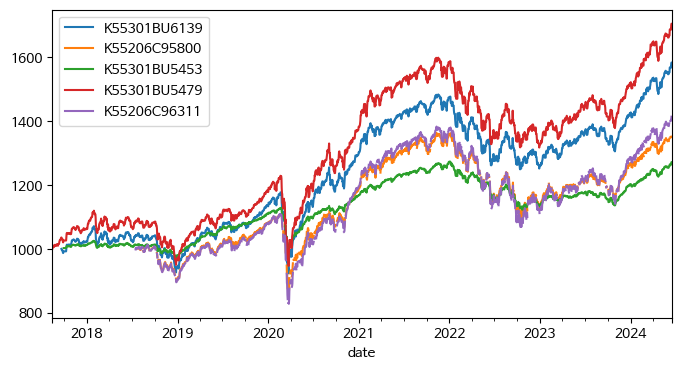

In [7]:
df_tdfs = tdf.df_prices
df_tdfs.plot(figsize=(8,4))

## ETF

In [70]:
etf = DataManager(
    file = 'etfs_selected_240611.csv',
    universe = 'ETF',
    path = path_data
)

In [71]:
etf.upload()
etf.get_names()

10 assets from 2002-10-14 to 2024-06-11 uploaded.
df_prices updated


0) 273130: KODEX 종합채권(AA-이상)액티브
1) 453850: ACE 미국30년국채액티브(H)
2) 284430: KODEX 200미국채혼합
3) 069500: KODEX 200
4) 379800: KODEX 미국S&P500TR
5) 411060: ACE KRX금현물
6) 305080: TIGER 미국채10년선물
7) 304660: KODEX 미국30년국채울트라선물(H)
8) 148070: KOSEF 국고채10년
9) 261220: KODEX WTI원유선물(H)

In [72]:
etf.get_date_range()

,start date,end date
069500,2002-10-14,2024-06-11
148070,2011-10-20,2024-06-11
261220,2016-12-27,2024-06-11
273130,2017-06-29,2024-06-11
284430,2017-11-30,2024-06-11
305080,2018-08-30,2024-06-11
304660,2018-09-12,2024-06-11
379800,2021-04-09,2024-06-11
411060,2021-12-15,2024-06-11
453850,2023-03-14,2024-06-11


In [61]:
df_etfs = etf.df_prices
#df_etfs.plot(figsize=(8,4))

In [62]:
tickers = df_etfs.columns
save=False
etf.download(tickers=tickers, save=save)

10 assets from 2021-01-04 to 2024-07-10 downloaded.
df_prices updated
Execution time of download: 0.76 secs


In [63]:
#file = 'test.csv'
#etf.save(file=file)

data/test.csv saved.


# Backtest

## TDF

In [13]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis=0, 
    days_in_year=365,
    asset_names = tdf.asset_names
)

### compare 1

In [19]:
bm = BacktestManager(df_tdfs, **kwargs_bm)

period reset: 2018-07-26 ~ 2024-06-13
running self.util_check_days_in_year to check days in a year


In [15]:
name = 'KOSPI'
ticker = '069500'
df_kospi = bm.util_import_data(ticker, name=name)

In [20]:
kwargs = dict(
    freq = 'Once', select = 'all', weigh = 'specified'
)

kwa_list = list()
for c in bm.df_assets.columns:
    kwa = {'name':c, 'weights':c}
    kwa_list.append(kwa)

bm.build_batch(*kwa_list, reset_portfolios=False, **kwargs)

RunOnce selected
RunOnce selected
RunOnce selected
RunOnce selected
RunOnce selected


In [21]:
bm.build(
    name = 'COMB1: Eqaully',
    freq = 'Y', select = 'all', weigh = 'equally'
)

In [22]:
bm.build(
    name = 'COMB2: ERC',
    freq = 'Y', select = 'all', weigh = 'ERC', 
    lookback=12, lag=0
)

In [23]:
bm.build(    
    name = 'COMB3: InvVol',
    freq = 'Y', select = 'all', weigh = 'InvVol', 
    lookback=12, lag=0
)

In [24]:
bm.benchmark(df_kospi)

RunOnce selected


Backtesting 9 strategies: K55301BU6139, K55206C95800, ... , KOSPI


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.40it/s]


Returning stats


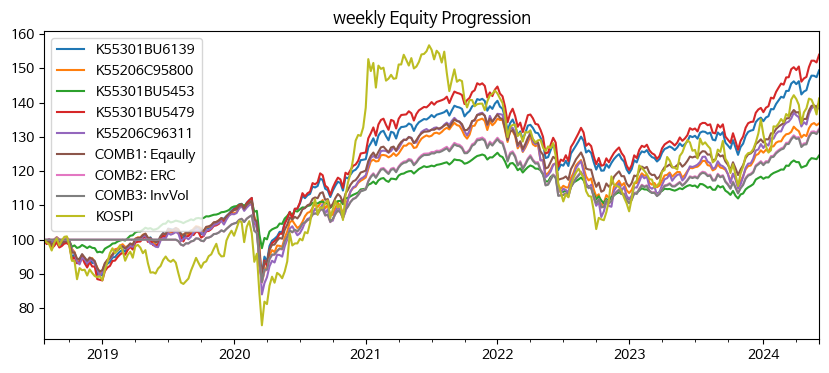

In [25]:
_ = bm.run(figsize=(10,4), freq='W')

In [26]:
bm.get_stats(sort_by='monthly_sharpe')

,K55301BU6139,K55301BU5479,K55301BU5453,COMB1: Eqaully,COMB3: InvVol,COMB2: ERC,K55206C95800,K55206C96311,KOSPI
start,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00
end,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00
total_return,0.504679,0.551419,0.250209,0.409573,0.328673,0.33254,0.349493,0.399272,0.427652
cagr,0.071877,0.077461,0.038666,0.060053,0.049462,0.04998,0.052238,0.058733,0.06235
calmar,0.334189,0.338044,0.299002,0.289013,0.2582,0.258253,0.237476,0.232444,0.180217
max_drawdown,-0.215078,-0.229146,-0.129315,-0.207786,-0.191565,-0.193532,-0.219971,-0.252675,-0.345974
avg_drawdown,-0.013912,-0.016287,-0.006914,-0.014604,-0.012442,-0.012857,-0.017237,-0.01988,-0.052904
avg_drawdown_days,26.802817,28.161765,26.257143,32.298246,29.88,30.693878,34.672727,37.607843,82.28
daily_vol,0.093971,0.105574,0.045479,0.067398,0.058253,0.058888,0.090317,0.107869,0.192791
daily_sharpe,0.803918,0.77701,0.877389,0.920299,0.878273,0.878024,0.622823,0.596079,0.417635


In [27]:
tdf.asset_names

{'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e',
 'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
 'K55301BU5453': '미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e',
 'K55301BU5479': '미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e',
 'K55206C96311': '키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
 '379800_R': 'KODEX 미국S&P500TR assumed from S&P500 rate of return'}

#### cross-validation

In [210]:
bm.cv_strategies

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
4) K55206C96311: 키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
5) COMB1: Eqaully
6) COMB2: ERC
7) COMB3: InvVol

In [211]:
pf_list = [0,5,6,7]
bm.cross_validate(pf_list, n_sample=10)

Cross-validating 4 strategies: K55301BU6139, COMB1: Eqaully, COMB2: ERC, COMB3: InvVol


100%|███████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.13it/s]


,K55301BU6139,COMB1: Eqaully,COMB2: ERC,COMB3: InvVol
avg_drawdown,-0.01 ± 0.001,-0.01 ± 0.001,-0.01 ± 0.001,-0.01 ± 0.001
avg_drawdown_days,21.95 ± 1.427,22.89 ± 1.241,25.75 ± 2.814,22.84 ± 1.405
cagr,0.08 ± 0.007,0.07 ± 0.006,0.05 ± 0.006,0.06 ± 0.005
calmar,0.37 ± 0.032,0.32 ± 0.029,0.25 ± 0.032,0.32 ± 0.028
daily_sharpe,0.74 ± 0.057,0.84 ± 0.071,0.69 ± 0.078,0.86 ± 0.067
daily_sortino,1.07 ± 0.085,1.22 ± 0.106,0.99 ± 0.116,1.23 ± 0.100
daily_vol,0.08 ± 0.001,0.05 ± 0.001,0.05 ± 0.001,0.05 ± 0.001
max_drawdown,-0.22 ± 0.000,-0.21 ± 0.000,-0.19 ± 0.000,-0.19 ± 0.000
monthly_sharpe,0.84 ± 0.064,0.70 ± 0.056,0.58 ± 0.063,0.71 ± 0.054
monthly_sortino,1.35 ± 0.117,1.08 ± 0.095,0.86 ± 0.100,1.07 ± 0.090


### compare 2

In [296]:
choice = ['K55301BU6139', 'K55206C95800']

bm = BacktestManager(df_tdfs[choice], **kwargs_bm)

period reset: 2018-07-26 ~ 2024-06-13


In [297]:
name = 'KOSPI'
ticker = '069500'
df_kospi = bm.util_import_data(ticker, name=name)

In [298]:
kwargs = dict(
    freq = 'Y', select = 'all', weigh = 'specified'
)

kwa_list = list()
for c in bm.df_assets.columns:
    kwa = {'name':c, 'weights':c}
    kwa_list.append(kwa)

bm.build_batch(*kwa_list, reset_portfolios=False, **kwargs)

In [299]:
bm.buy_n_hold(
    name = 'COMB: Buy&Hold'
)

RunOnce selected


In [300]:
bm.build(
    name = 'COMB: Eqaully',
    freq = 'Y', select = 'all', weigh = 'equally'
)

In [301]:
bm.build(
    name = 'COMB: InvVol',
    freq = 'Y', select = 'all', weigh = 'InvVol',
    lookback=12, lag=0
)

In [302]:
bm.benchmark(df_kospi)

RunOnce selected


Backtesting 6 strategies: K55301BU6139, K55206C95800, ... , KOSPI


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.34it/s]


Returning stats


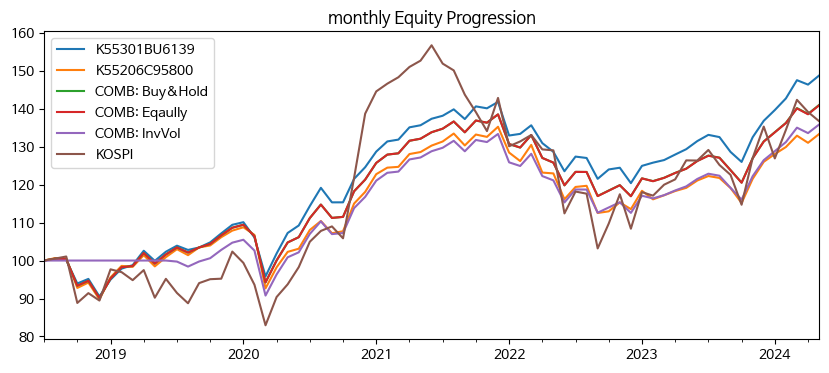

In [303]:
_ = bm.run(figsize=(10,4), freq='M')

In [304]:
bm.get_stats(sort_by='monthly_sharpe')

,K55301BU6139,COMB: Buy&Hold,COMB: Eqaully,COMB: InvVol,K55206C95800,KOSPI
start,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00
end,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00
total_return,0.504679,0.427069,0.42572,0.380634,0.349493,0.427652
cagr,0.071877,0.062277,0.062106,0.056324,0.052238,0.06235
calmar,0.334189,0.288806,0.288009,0.261127,0.237476,0.180217
max_drawdown,-0.215078,-0.215635,-0.215639,-0.215695,-0.219971,-0.345974
avg_drawdown,-0.013912,-0.016183,-0.016187,-0.015074,-0.017237,-0.052904
avg_drawdown_days,26.802817,34.277778,34.277778,32.085106,34.672727,82.28
daily_vol,0.093971,0.070181,0.07022,0.066594,0.090317,0.192791
daily_sharpe,0.803918,0.91714,0.914325,0.876377,0.622823,0.417635


In [305]:
bm.build(
    name = 'COMB: InvVol2',
    freq = 'Q', select = 'all', weigh = 'InvVol',
    lookback=12, lag=0
)

bm.build(
    name = 'COMB: MeanVar',
    freq = 'Q', select = 'all', weigh = 'MeanVar',
    lookback=12, lag=0
)

In [306]:
bm.portfolios

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) COMB: Buy&Hold
3) COMB: Eqaully
4) COMB: InvVol
5) KOSPI
6) COMB: InvVol2
7) COMB: MeanVar

In [307]:
bm.run([4,6,7], plot=False)

Backtesting 3 strategies: COMB: InvVol, COMB: InvVol2, COMB: MeanVar


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  3.00it/s]

Returning stats


,COMB: InvVol,COMB: InvVol2,COMB: MeanVar
start,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00
end,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00
total_return,0.380634,0.516172,0.446328
cagr,0.056324,0.073263,0.064699
calmar,0.261127,0.339703,0.300176
max_drawdown,-0.215695,-0.215668,-0.215536
avg_drawdown,-0.013894,-0.013843,-0.012394
avg_drawdown_days,29.843137,28.47541,25.758065
daily_vol,0.05461,0.056506,0.059273
daily_sharpe,0.719687,0.891691,0.759498


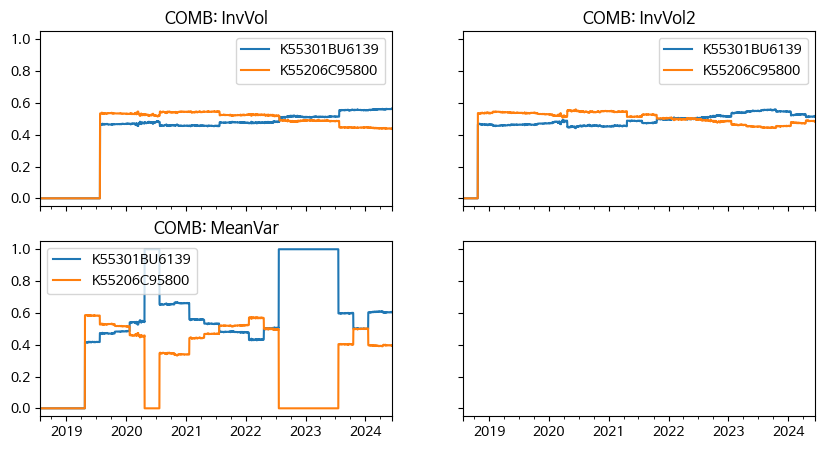

In [308]:
bm.plot_security_weights(figsize=(10,5))

In [309]:
df = bm.get_security_weights(1)
df.head()

COMB: InvVol2: weights at transactions returned


,K55301BU6139,K55206C95800
Date,,
2018-10-25,0.463921,0.535992
2019-01-24,0.455569,0.544366
2019-04-25,0.461322,0.538581
2019-07-25,0.466092,0.533813
2019-10-24,0.468700,0.531217


#### cross-validation

In [310]:
bm.cv_strategies

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) COMB: Buy&Hold
3) COMB: Eqaully
4) COMB: InvVol
5) COMB: InvVol2
6) COMB: MeanVar

In [311]:
pf_list = [0,3,4,6]
bm.cross_validate(pf_list)

Cross-validating 4 strategies: K55301BU6139, COMB: Eqaully, COMB: InvVol, COMB: MeanVar


100%|███████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.94it/s]


,K55301BU6139,COMB: Eqaully,COMB: InvVol,COMB: MeanVar
avg_drawdown,-0.01 ± 0.001,-0.01 ± 0.001,-0.01 ± 0.001,-0.01 ± 0.001
avg_drawdown_days,21.80 ± 1.578,27.91 ± 1.556,27.69 ± 1.887,26.76 ± 1.973
cagr,0.08 ± 0.006,0.07 ± 0.006,0.07 ± 0.006,0.06 ± 0.004
calmar,0.38 ± 0.030,0.33 ± 0.028,0.33 ± 0.029,0.29 ± 0.020
daily_sharpe,0.76 ± 0.054,0.87 ± 0.071,0.87 ± 0.071,0.73 ± 0.043
daily_sortino,1.10 ± 0.081,1.26 ± 0.107,1.27 ± 0.107,1.05 ± 0.065
daily_vol,0.08 ± 0.001,0.06 ± 0.001,0.06 ± 0.001,0.06 ± 0.001
max_drawdown,-0.22 ± 0.000,-0.22 ± 0.000,-0.22 ± 0.000,-0.22 ± 0.003
monthly_sharpe,0.85 ± 0.062,0.72 ± 0.057,0.72 ± 0.058,0.67 ± 0.037
monthly_sortino,1.38 ± 0.111,1.12 ± 0.098,1.11 ± 0.099,1.02 ± 0.071


In [312]:
bm.portfolios

0) K55301BU6139
1) K55206C95800
2) COMB: Buy&Hold
3) COMB: Eqaully
4) COMB: InvVol
5) KOSPI
6) COMB: InvVol2
7) COMB: MeanVar

In [313]:
bm.cv_strategies

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) COMB: Buy&Hold
3) COMB: Eqaully
4) COMB: InvVol
5) COMB: InvVol2
6) COMB: MeanVar

## ETF

In [13]:
choice = ['069500', '273130', '148070', '379800']
etf.get_names(tickers=choice)

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR

In [23]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis=0, 
    days_in_year=246
)

In [46]:
kwargs_build = dict(
    freq = 'Y', select = 'all', lookback=12, lag=0
)

### compare 1

In [38]:
bm = BacktestManager(df_etfs[choice], **kwargs_bm)

period reset: 2021-04-09 ~ 2024-06-11
running self.util_check_days_in_year to check days in a year


In [40]:
kwa_list = list()
for c in bm.df_assets.columns:
    c2 = etf.asset_names[c]
    kwa = {'name':c2, 'weights':c}
    kwa_list.append(kwa)

bm.build_batch(*kwa_list, reset_portfolios=False, weigh='specified', **kwargs_build)

In [41]:
bm.build(
    name = 'COMB1: Eqaully', weigh = 'equally', **kwargs_build
)

In [42]:
bm.build(
    name = 'COMB1: ERC', weigh = 'ERC', **kwargs_build
)

In [43]:
bm.build(
    name = 'COMB1: InvVol', weigh = 'InvVol', **kwargs_build
)

Backtesting 7 strategies: KODEX 200, KODEX 종합채권(AA-이상)액티브, ... , COMB1: InvVol


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]


Returning stats


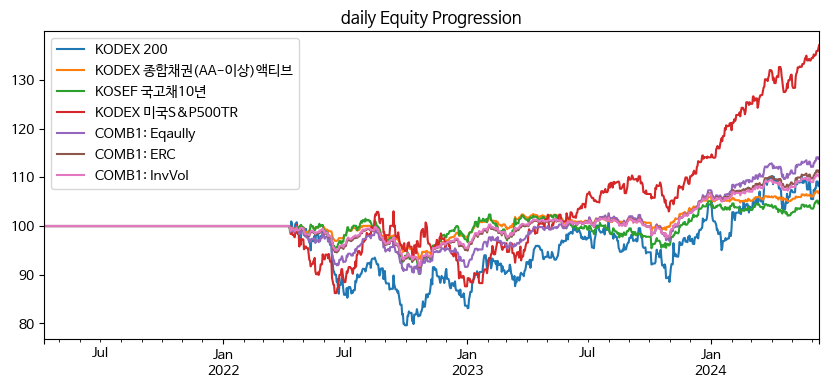

In [44]:
_ = bm.run(figsize=(10,4), freq='D')

In [45]:
bm.get_stats(sort_by='monthly_sharpe')

,KODEX 미국S&P500TR,COMB1: ERC,COMB1: Eqaully,COMB1: InvVol,KODEX 종합채권(AA-이상)액티브,KOSEF 국고채10년,KODEX 200
start,2021-04-08,2021-04-08,2021-04-08,2021-04-08,2021-04-08,2021-04-08,2021-04-08
end,2024-06-11,2024-06-11,2024-06-11,2024-06-11,2024-06-11,2024-06-11,2024-06-11
total_return,0.370918,0.113125,0.140404,0.104671,0.069696,0.048146,0.083681
cagr,0.104437,0.034321,0.042236,0.031841,0.021441,0.014916,0.025627
calmar,0.698641,0.406947,0.433272,0.389425,0.313399,0.133571,0.121403
max_drawdown,-0.149486,-0.084338,-0.097481,-0.081764,-0.068414,-0.111673,-0.21109
avg_drawdown,-0.017908,-0.009119,-0.010683,-0.009218,-0.009457,-0.023844,-0.048706
avg_drawdown_days,17.384615,22.935484,23.566667,24.62069,32.043478,54.428571,63.666667
daily_vol,0.121376,0.048358,0.064666,0.046434,0.037567,0.067764,0.143011
daily_sharpe,0.899497,0.739297,0.687916,0.714978,0.59747,0.257761,0.25267


### compare 2

In [47]:
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(choice, weights))

bm.build(    
    name = 'COMB4: spec',
    weigh = 'specified', 
    weights = weights,
    **kwargs_build
)

In [48]:
weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(choice, weights))

bm.build(    
    name = 'COMB5: spec',
    weigh = 'specified', 
    weights = weights,
    **kwargs_build
)

In [49]:
bm.portfolios

0) KODEX 200
1) KODEX 종합채권(AA-이상)액티브
2) KOSEF 국고채10년
3) KODEX 미국S&P500TR
4) COMB1: Eqaully
5) COMB1: ERC
6) COMB1: InvVol
7) COMB4: spec
8) COMB5: spec

In [53]:
_ = bm.run([4,5,6,7,8], plot=False)
bm.get_stats(sort_by='monthly_sharpe')

Backtesting 5 strategies: COMB1: Eqaully, COMB1: ERC, COMB1: InvVol, COMB4: spec, COMB5: spec


100%|██████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 47989.75it/s]

Returning stats


,COMB4: spec,COMB1: ERC,COMB1: Eqaully,COMB1: InvVol,COMB5: spec
start,2021-04-08,2021-04-08,2021-04-08,2021-04-08,2021-04-08
end,2024-06-11,2024-06-11,2024-06-11,2024-06-11,2024-06-11
total_return,0.153312,0.113125,0.140404,0.104671,0.125448
cagr,0.045936,0.034321,0.042236,0.031841,0.037913
calmar,0.499394,0.406947,0.433272,0.389425,0.358003
max_drawdown,-0.091984,-0.084338,-0.097481,-0.081764,-0.1059
avg_drawdown,-0.009796,-0.009119,-0.010683,-0.009218,-0.013206
avg_drawdown_days,21.78125,22.935484,23.566667,24.62069,27.961538
daily_vol,0.064555,0.048358,0.064666,0.046434,0.067424
daily_sharpe,0.745267,0.739297,0.687916,0.714978,0.59929


In [54]:
bm.cv_strategies

0) KODEX 200
1) KODEX 종합채권(AA-이상)액티브
2) KOSEF 국고채10년
3) KODEX 미국S&P500TR
4) COMB1: Eqaully
5) COMB1: ERC
6) COMB1: InvVol
7) COMB4: spec
8) COMB5: spec

In [55]:
pf_list = [4,5,6]
bm.cross_validate(pf_list)

Cross-validating 3 strategies: COMB1: Eqaully, COMB1: ERC, COMB1: InvVol


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.79it/s]


,COMB1: Eqaully,COMB1: ERC,COMB1: InvVol
avg_drawdown,-0.01 ± 0.001,-0.01 ± 0.002,-0.01 ± 0.002
avg_drawdown_days,14.40 ± 4.290,15.96 ± 3.947,16.76 ± 4.471
cagr,0.06 ± 0.011,0.05 ± 0.008,0.04 ± 0.008
calmar,0.86 ± 0.284,0.85 ± 0.364,0.82 ± 0.364
daily_sharpe,1.14 ± 0.281,1.14 ± 0.250,1.09 ± 0.248
daily_sortino,1.83 ± 0.471,1.81 ± 0.415,1.74 ± 0.410
daily_vol,0.05 ± 0.009,0.04 ± 0.006,0.04 ± 0.005
max_drawdown,-0.07 ± 0.017,-0.06 ± 0.021,-0.06 ± 0.021
monthly_sharpe,0.88 ± 0.215,0.87 ± 0.201,0.84 ± 0.199
monthly_sortino,1.98 ± 0.806,2.27 ± 0.900,2.24 ± 0.903


### compare 3

In [75]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
etf.get_names(tickers=choice)

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

In [79]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis=0, 
    days_in_year=245
)

In [82]:
kwargs_lags = dict(lookback=12, lag=0)
kwargs_build = dict(
    freq = 'Y', select = 'all', **kwargs_lags
)

In [83]:
bm = BacktestManager(df_etfs[choice], **kwargs_bm)

period reset: 2021-12-15 ~ 2024-06-11
running self.util_check_days_in_year to check days in a year


In [84]:
bm.build(
    name = 'COMB1: Eqaully', weigh = 'equally', **kwargs_build
)

In [85]:
bm.build(
    name = 'COMB1: ERC', weigh = 'ERC', **kwargs_build
)

In [86]:
bm.build(
    name = 'COMB1: InvVol', weigh = 'InvVol', **kwargs_build
)

In [87]:
bm.benchmark_ticker(**kwargs_lags)

Benchmark is KODEX200
RunOnce selected


Backtesting 4 strategies: COMB1: Eqaully, COMB1: ERC, COMB1: InvVol, KODEX200


100%|█████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 100462.37it/s]

Returning stats


,COMB1: Eqaully,COMB1: ERC,COMB1: InvVol,KODEX200
start,2021-12-14,2021-12-14,2021-12-14,2021-12-14
end,2024-06-11,2024-06-11,2024-06-11,2024-06-11
total_return,0.204338,0.172058,0.151471,0.221298
cagr,0.077483,0.065797,0.058243,0.083547
calmar,2.080351,1.695206,1.532179,0.662697
max_drawdown,-0.037245,-0.038813,-0.038013,-0.126072
avg_drawdown,-0.008567,-0.007992,-0.007679,-0.032434
avg_drawdown_days,13.96875,18.625,19.608696,25.315789
daily_vol,0.046214,0.04049,0.039045,0.126376
daily_sharpe,1.682675,1.637588,1.509505,0.715522


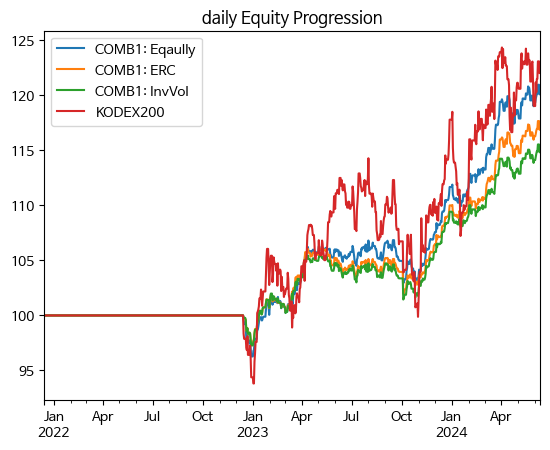

In [90]:
bm.run()

In [91]:
pf_list = [0,1,2]
bm.cross_validate(pf_list)

Cross-validating 3 strategies: COMB1: Eqaully, COMB1: ERC, COMB1: InvVol


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.74it/s]


,COMB1: Eqaully,COMB1: ERC,COMB1: InvVol
avg_drawdown,-0.01 ± 0.001,-0.01 ± 0.001,-0.01 ± 0.001
avg_drawdown_days,11.71 ± 2.467,15.88 ± 5.603,15.27 ± 4.905
cagr,0.06 ± 0.017,0.05 ± 0.014,0.05 ± 0.013
calmar,1.81 ± 0.436,1.59 ± 0.414,1.47 ± 0.444
daily_sharpe,1.57 ± 0.264,1.52 ± 0.256,1.43 ± 0.253
daily_sortino,2.68 ± 0.502,2.55 ± 0.522,2.38 ± 0.516
daily_vol,0.04 ± 0.006,0.03 ± 0.006,0.03 ± 0.006
max_drawdown,-0.03 ± 0.006,-0.03 ± 0.008,-0.03 ± 0.008
monthly_sharpe,1.14 ± 0.198,1.11 ± 0.188,1.03 ± 0.172
monthly_sortino,5.54 ± 3.133,6.60 ± 4.319,4.37 ± 1.776


### compare 4

In [94]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
etf.get_names(tickers=choice)

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

In [95]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis=0, 
    days_in_year=245
)

In [96]:
kwargs_build = dict(
    select = 'all', weigh = 'equally'
)

In [101]:
bm = BacktestManager(df_etfs[choice], **kwargs_bm)

period reset: 2021-12-15 ~ 2024-06-11
running self.util_check_days_in_year to check days in a year


In [102]:
bm.build(
    name = 'FREQ:M', freq='M', **kwargs_build
)

In [103]:
bm.build(
    name = 'FREQ:Q', freq='Q', **kwargs_build
)

In [104]:
bm.build(
    name = 'FREQ:Y', freq='Y', **kwargs_build
)

In [105]:
bm.cross_validate()

Cross-validating 3 strategies: FREQ:M, FREQ:Q, FREQ:Y


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.24it/s]


,FREQ:M,FREQ:Q,FREQ:Y
avg_drawdown,-0.01 ± 0.001,-0.01 ± 0.001,-0.01 ± 0.001
avg_drawdown_days,22.96 ± 5.570,22.75 ± 5.221,22.37 ± 4.947
cagr,0.07 ± 0.009,0.07 ± 0.009,0.07 ± 0.009
calmar,1.08 ± 0.548,1.08 ± 0.544,1.07 ± 0.550
daily_sharpe,1.21 ± 0.277,1.20 ± 0.271,1.19 ± 0.271
daily_sortino,2.03 ± 0.473,2.03 ± 0.461,2.01 ± 0.462
daily_vol,0.06 ± 0.006,0.06 ± 0.006,0.06 ± 0.005
max_drawdown,-0.07 ± 0.019,-0.07 ± 0.019,-0.07 ± 0.019
monthly_sharpe,0.92 ± 0.191,0.92 ± 0.190,0.91 ± 0.187
monthly_sortino,1.94 ± 0.576,1.95 ± 0.574,1.94 ± 0.564


# Bayesian

## Portfolios

In [8]:
name = 'TDF COMB'
tickers = ['K55301BU6139', 'K55206C95800']
weights = [0.5, 0.5]
kwa = {'name': name, 'weights': dict(zip(tickers, weights))}
pf_list = [kwa]
tdf.get_names(tickers=tickers)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [9]:
tickers = ['K55301BU6139']
name = tickers[0]
weights = [1]
kwa = {'name': name, 'weights': dict(zip(tickers, weights))}
pf_list.append(kwa)

In [10]:
tickers = ['K55206C95800']
name = tickers[0]
weights = [1]
kwa = {'name': name, 'weights': dict(zip(tickers, weights))}
pf_list.append(kwa)

## Backtest

In [11]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis=0, 
    days_in_year=365,
    asset_names = tdf.asset_names
)

In [12]:
bm = BacktestManager(df_tdfs, **kwargs_bm)

period reset: 2018-07-26 ~ 2024-06-13
running self.util_check_days_in_year to check days in a year


In [13]:
kwargs = dict(
    freq = 'Y', select = 'all', weigh = 'specified'
)

bm.build_batch(*pf_list, **kwargs)

In [14]:
name = 'KOSPI'
ticker = '069500'
df_kospi = bm.util_import_data(ticker, name=name)

bm.benchmark(df_kospi)

RunOnce selected


Backtesting 4 strategies: TDF COMB, K55301BU6139, K55206C95800, KOSPI


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.43it/s]

Returning stats


,TDF COMB,K55301BU6139,K55206C95800,KOSPI
start,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00
end,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00,2024-06-13 00:00:00
total_return,0.42572,0.504679,0.349493,0.427652
cagr,0.062106,0.071877,0.052238,0.06235
calmar,0.288009,0.334189,0.237476,0.180217
max_drawdown,-0.215639,-0.215078,-0.219971,-0.345974
avg_drawdown,-0.016187,-0.013912,-0.017237,-0.052904
avg_drawdown_days,34.277778,26.802817,34.672727,82.28
daily_vol,0.07022,0.093971,0.090317,0.192791
daily_sharpe,0.914325,0.803918,0.622823,0.417635


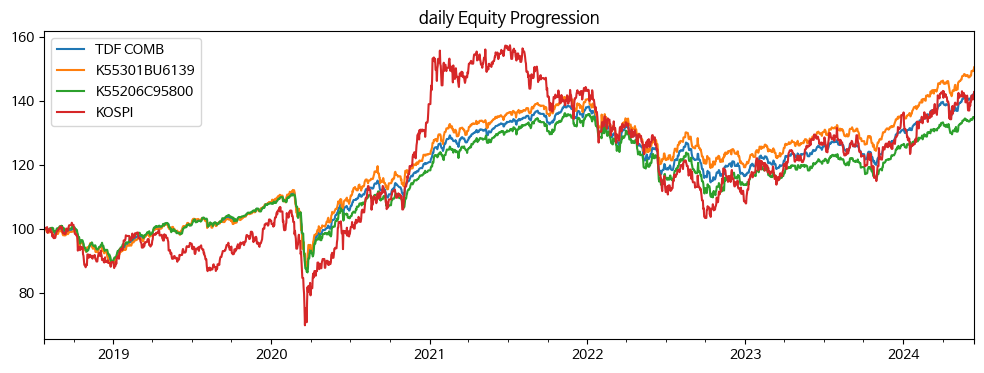

In [15]:
bm.run(figsize=(12,4))

## Cross-validation

In [16]:
bm.cv_strategies

0) TDF COMB
1) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
2) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [17]:
pf_list = [0,1]
bm.cross_validate(pf_list)

Cross-validating 2 strategies: TDF COMB, K55301BU6139


100%|███████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.38it/s]


,TDF COMB,K55301BU6139
avg_drawdown,-0.01 ± 0.001,-0.01 ± 0.001
avg_drawdown_days,29.16 ± 2.079,22.96 ± 1.894
cagr,0.07 ± 0.006,0.08 ± 0.007
calmar,0.31 ± 0.028,0.36 ± 0.031
daily_sharpe,0.83 ± 0.072,0.73 ± 0.056
daily_sortino,1.20 ± 0.107,1.06 ± 0.084
daily_vol,0.06 ± 0.001,0.08 ± 0.001
max_drawdown,-0.22 ± 0.000,-0.22 ± 0.000
monthly_sharpe,0.68 ± 0.060,0.81 ± 0.067
monthly_sortino,1.05 ± 0.106,1.31 ± 0.125


## Estimate

In [18]:
df_bts = bm.get_historical()
df_bts.head()

,TDF COMB,K55301BU6139,K55206C95800,KOSPI
2018-07-25,100.000000,100.000000,100.000000,100.0000
2018-07-26,100.000000,100.000000,100.000000,100.0000
2018-07-27,100.016635,99.933281,100.099998,100.3116
2018-07-30,99.949358,99.618750,100.279995,100.0684
2018-07-31,99.617959,99.065938,100.169997,100.2052


In [19]:
#df = df_bts[['KOSPI', 'TDF COMB']]
df = df_bts[['K55301BU6139', 'TDF COMB']]
ae = AssetEvaluator(df, days_in_year=246)

In [20]:
ae.summary(freq='yearly')

,K55301BU6139,TDF COMB
years,5.9,5.9
cagr,0.071828,0.062064
yearly_mean,0.076492,0.06716
yearly_vol,0.116571,0.11671
yearly_sharpe,0.656178,0.575447


In [21]:
ae.bayesian_sample(freq='yearly')

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:04

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [22]:
var_names = ['_mean', '_vol']
ae.bayesian_summary(var_names)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
yearly_mean[K55301BU6139],0.076,0.003,0.070,0.083,0.0,0.0,4547.0,2947.0,1.0
yearly_mean[TDF COMB],0.067,0.003,0.060,0.073,0.0,0.0,3874.0,3152.0,1.0
yearly_vol[K55301BU6139],0.115,0.003,0.110,0.119,0.0,0.0,4524.0,3449.0,1.0
yearly_vol[TDF COMB],0.115,0.002,0.111,0.120,0.0,0.0,4062.0,3086.0,1.0


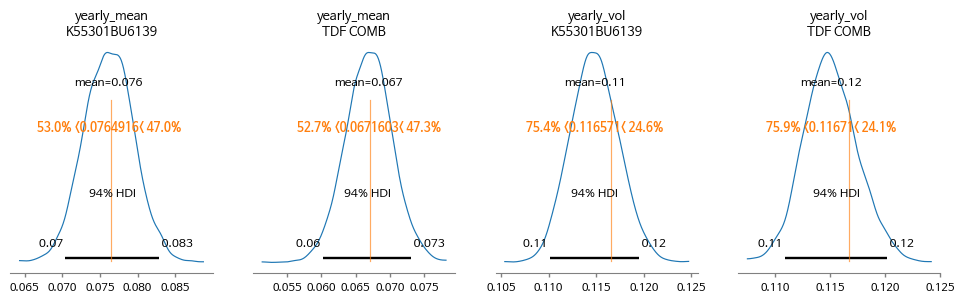

In [23]:
ae.bayesian_plot(var_names, figsize=(12,3), textsize=8)

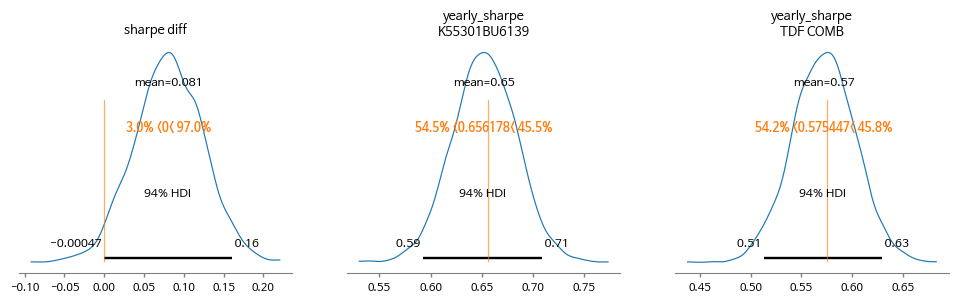

In [24]:
var_names = 'sharpe'
ae.bayesian_plot(var_names, figsize=(12,3), textsize=8)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:04

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


ratio of nan filled forward::
  K55301BU6139: 0.000
  TDF COMB: 0.000


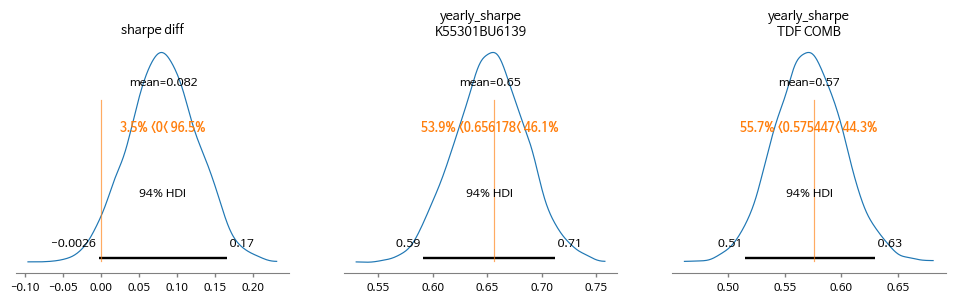

In [25]:
ae.bayesian_sample(freq='yearly', align_period=True)
ae.bayesian_plot(var_names, figsize=(12,3), textsize=8)

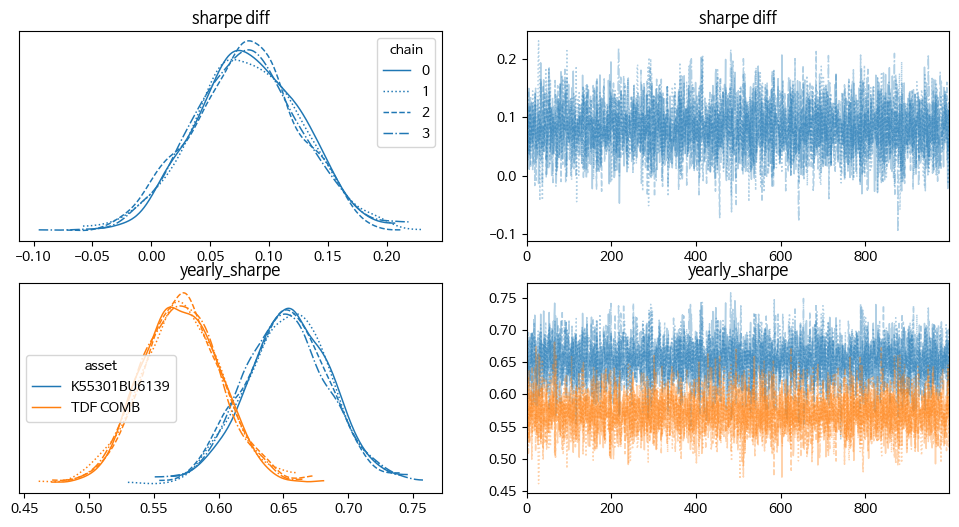

In [26]:
_ = ae.plot_trace(var_names=var_names, legend=True)

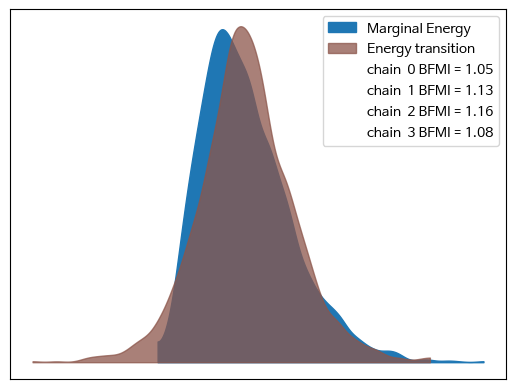

In [27]:
_ = ae.plot_energy()

### Annulize Test

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:04

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


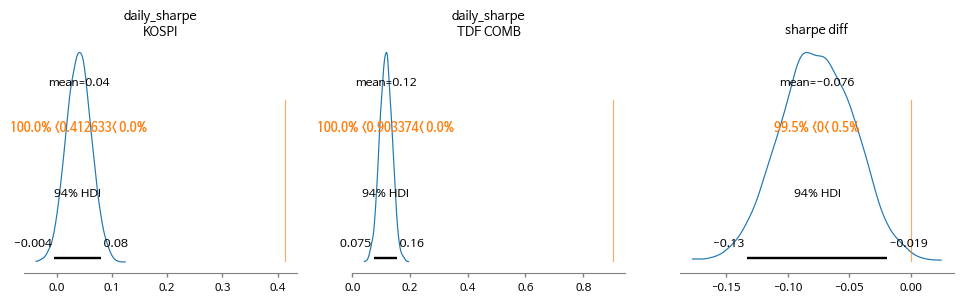

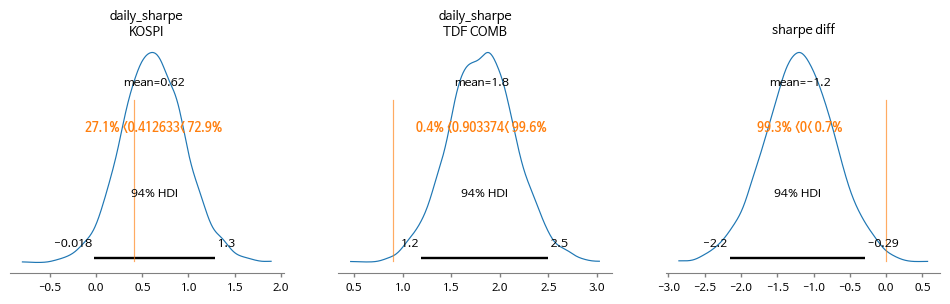

In [26]:
freq='daily'
annualize = True
for debug_annualize in [True, False]:
    ae.bayesian_sample(freq=freq, annualize=annualize, debug_annualize=debug_annualize)
    ae.bayesian_plot('sharpe', figsize=(12,3), textsize=8)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:06

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


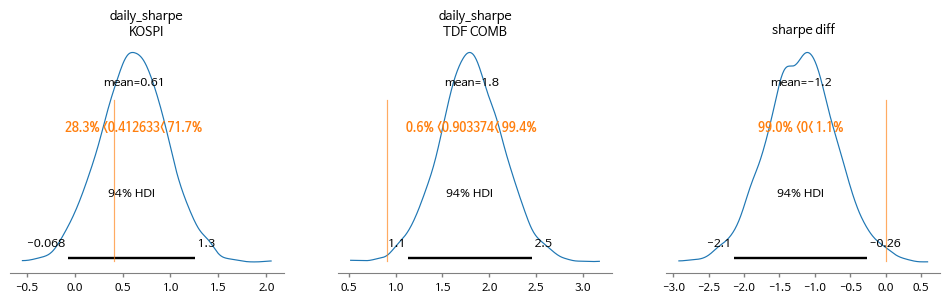

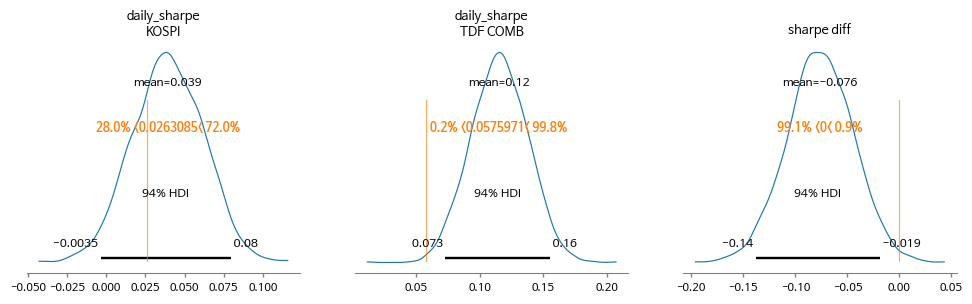

In [27]:
freq='daily'
for annualize in [True, False]:
    ae.bayesian_sample(freq=freq, annualize=annualize)
    ae.bayesian_plot('sharpe', figsize=(12,3), textsize=8)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:08

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


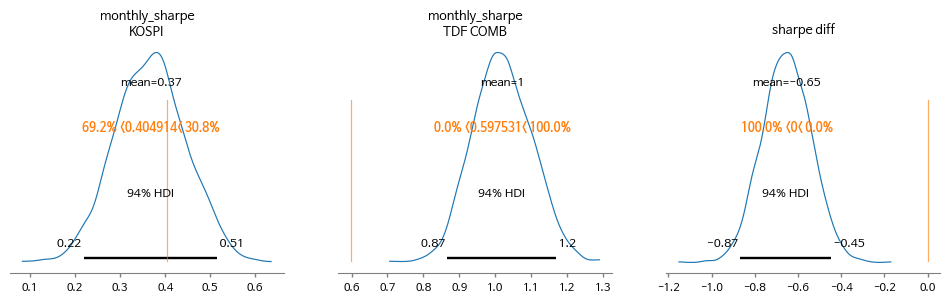

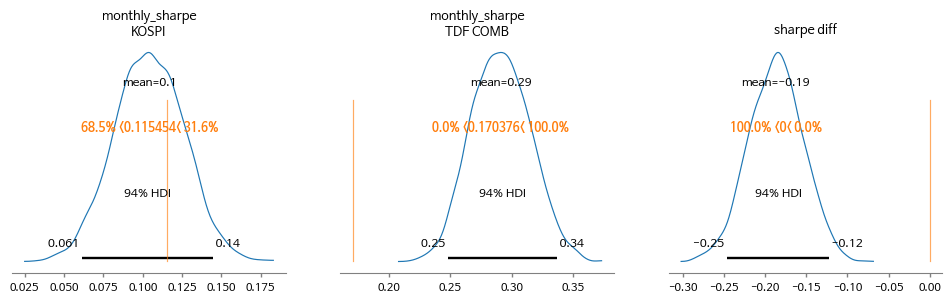

In [28]:
freq='monthly'
for annualize in [True, False]:
    ae.bayesian_sample(freq=freq, annualize=annualize)
    ae.bayesian_plot('sharpe', figsize=(12,3), textsize=8)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:08

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


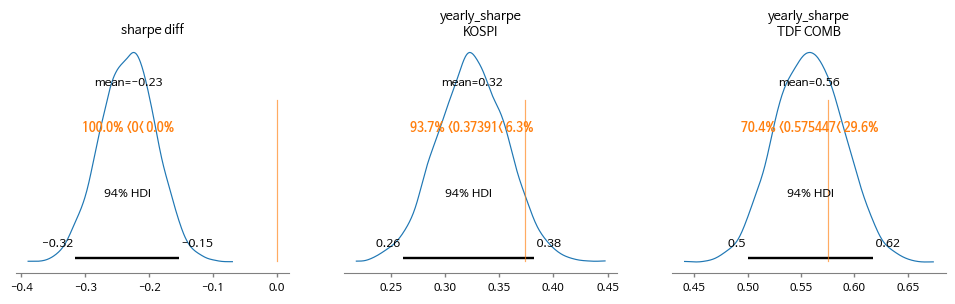

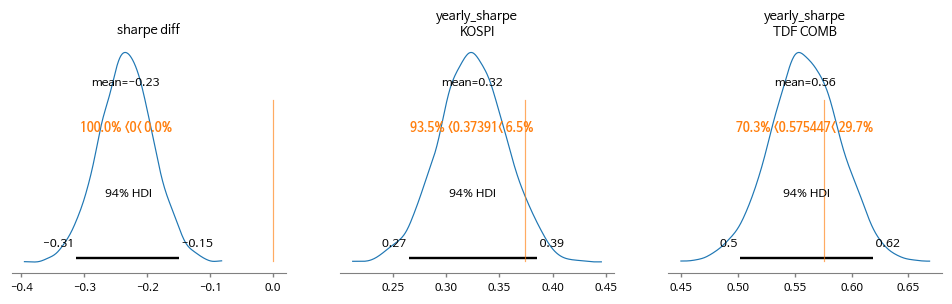

In [29]:
freq='yearly'
for annualize in [True, False]:
    ae.bayesian_sample(freq=freq, annualize=annualize)
    ae.bayesian_plot('sharpe', figsize=(12,3), textsize=8)